In [55]:
library(UpSetR)
library(Cairo)
library(SuperExactTest)
library(ggplot2)

In [2]:
load("DEGs.set_lists.qval0.1.RData")

In [3]:
xxx_replace_xxx_pcre <- function(string, patterns, replacements) {
   for (i in seq_along(patterns))
      string <- gsub(patterns[i], replacements[i], string, perl=TRUE)
   string
}

In [4]:
#lines=list("WT"="WT","deltaDEK"="Δdek1","LG3"="Δlg3","Loop"="Δloop","OE"="oex1")
lines=list("WT"="WT","deltaDEK"="Δdek1","OE"="oex1","LG3"="Δlg3","Loop"="Δloop")
skip=c("Δlg3","Δloop")
LL=L[names(L)[grep(paste(names(lines),collapse="|"),names(L))]]
names(LL)=xxx_replace_xxx_pcre(names(LL), names(lines), unlist(lines,use.names=F))
names(LL)=gsub("_"," ",gsub("vs","vs.",gsub("\\."," ",names(LL))))
str(LL)
LLL=LL[grep(paste(skip,collapse="|"),names(LL),invert=TRUE)]
str(LLL)

List of 10
 $ Δdek1 vs. oex1 up  : chr [1:8842] "Pp3c17_17550.mRNA" "Pp3c24_2170.mRNA" "Pp3c5_28230.mRNA" "Pp3c17_9369.mRNA" ...
 $ WT vs. Δdek1 up    : chr [1:5933] "Pp3c21_8110.mRNA" "Pp3c16_24530.mRNA" "Pp3c1_32020.mRNA" "Pp3c11_12520.mRNA" ...
 $ WT vs. Δlg3 up     : chr [1:3582] "Pp3c24_13920.mRNA" "Pp3c24_19500.mRNA" "Pp3c24_15180.mRNA" "Pp3c24_6340.mRNA" ...
 $ WT vs. Δloop up    : chr [1:3144] "Pp3c21_8110.mRNA" "Pp3c11_7360.mRNA" "Pp3s406_20.mRNA" "Pp3c16_24530.mRNA" ...
 $ WT vs. oex1 up     : chr [1:7715] "Pp3c17_17550.mRNA" "Pp3c5_28230.mRNA" "Pp3c24_2170.mRNA" "Pp3c6_19501.mRNA" ...
 $ Δdek1 vs. oex1 down: chr [1:8675] "Pp3c2_27820.mRNA" "Pp3s44_20.mRNA" "Pp3c13_120.mRNA" "Pp3c4_21860.mRNA" ...
 $ WT vs. Δdek1 down  : chr [1:6534] "Pp3c17_17550.mRNA" "Pp3c2_22630.mRNA" "Pp3c21_5540.mRNA" "Pp3c14_12940.mRNA" ...
 $ WT vs. Δlg3 down   : chr [1:3889] "Pp3c21_14179.mRNA" "Pp3c5_14860.mRNA" "Pp3c26_6380.mRNA" "Pp3c23_14490.mRNA" ...
 $ WT vs. Δloop down  : chr [1:2714] "Pp3c4_2

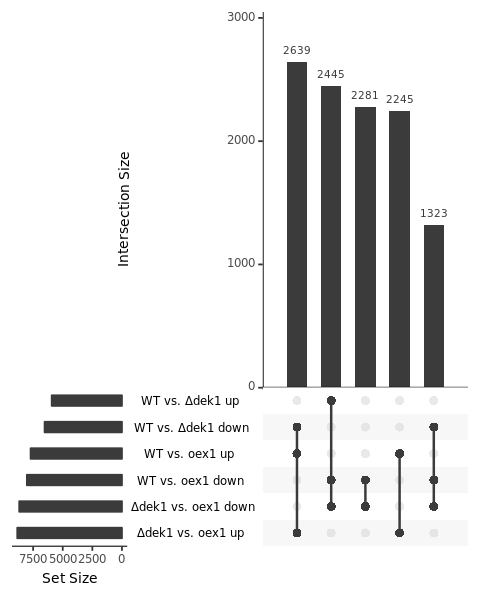

In [7]:
options(repr.plot.width=4, repr.plot.height=5)
upset(fromList(LLL), order.by = "freq",keep.order = TRUE,nsets=length(names(LL)),nintersects=5,mb.ratio = c(0.65, 0.35))

png 
  2

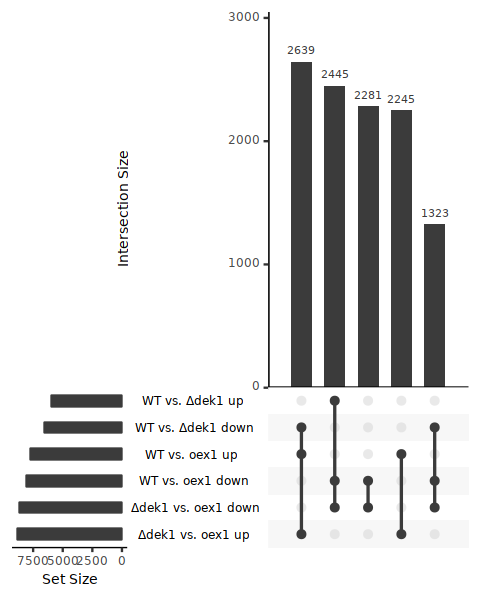

In [14]:
CairoPDF("reduced_DEGSets.upsetr.pdf",width=4,height=5)
upset(fromList(LLL), order.by = "freq",keep.order = TRUE,nsets=length(names(LL)),nintersects=5,mb.ratio = c(0.65, 0.35))
dev.off()
options(old)

In [20]:
n=37359

In [21]:
resr=supertest(LLL, n=n)

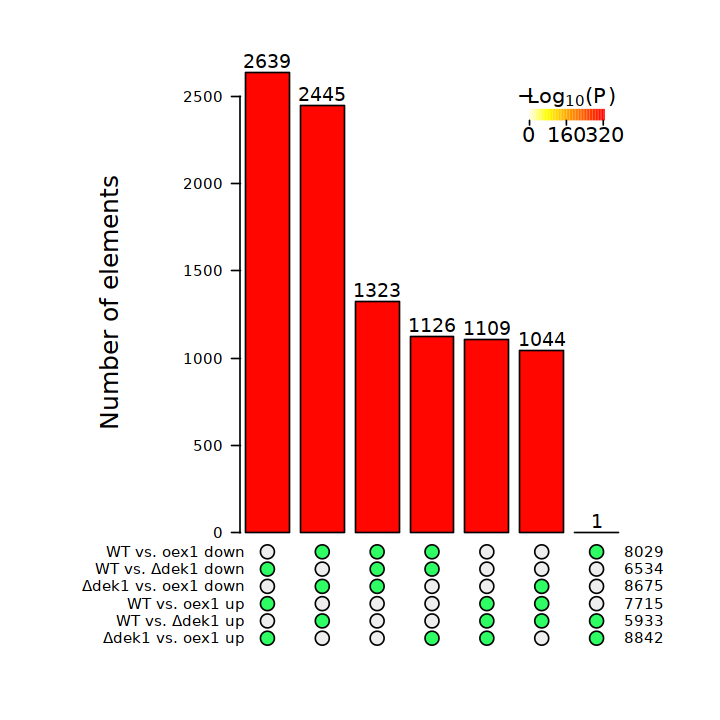

In [43]:
options(repr.plot.width=6, repr.plot.height=6)
plot(resr, Layout="landscape", degree=3,sort.by="size", margin=c(3,10,3,4),cex=.7,keep=FALSE)

In [30]:
Xr=summary(resr)

In [37]:
subset(Xr$Table[,-7],Degree==3 & Observed.Overlap>0)

,Intersections,Degree,Observed.Overlap,Expected.Overlap,FE,P.value
000111,Δdek1 vs. oex1 down & WT vs. Δdek1 down & WT vs. oex1 down,3,1323,326.0766,4.057329310,0
010101,WT vs. Δdek1 up & Δdek1 vs. oex1 down & WT vs. oex1 down,3,2445,296.0839,8.257794279,0
011100,WT vs. Δdek1 up & WT vs. oex1 up & Δdek1 vs. oex1 down,3,1044,284.5046,3.669536586,0
100011,Δdek1 vs. oex1 up & WT vs. Δdek1 down & WT vs. oex1 down,3,1126,332.3538,3.387956126,0
101010,Δdek1 vs. oex1 up & WT vs. oex1 up & WT vs. Δdek1 down,3,2639,319.3560,8.263505201,0
110001,Δdek1 vs. oex1 up & WT vs. Δdek1 up & WT vs. oex1 down,3,1,301.7837,0.003313631,1
111000,Δdek1 vs. oex1 up & WT vs. Δdek1 up & WT vs. oex1 up,3,1109,289.9815,3.824381798,0


In [44]:
subset(Xr$Table[,-7],Degree==2 & Observed.Overlap>0)

,Intersections,Degree,Observed.Overlap,Expected.Overlap,FE,P.value
000011,WT vs. Δdek1 down & WT vs. oex1 down,2,2772,1404.253,1.9740033,0.000000e+00
000101,Δdek1 vs. oex1 down & WT vs. oex1 down,2,6049,1864.385,3.2445008,0.000000e+00
000110,Δdek1 vs. oex1 down & WT vs. Δdek1 down,2,1330,1517.237,0.8765935,1.000000e+00
001010,WT vs. oex1 up & WT vs. Δdek1 down,2,2640,1349.335,1.9565192,0.000000e+00
001100,WT vs. oex1 up & Δdek1 vs. oex1 down,2,1156,1791.473,0.6452792,1.000000e+00
010001,WT vs. Δdek1 up & WT vs. oex1 down,2,2448,1275.089,1.9198657,8.161806e-316
010100,WT vs. Δdek1 up & Δdek1 vs. oex1 down,2,4383,1377.681,3.1814337,0.000000e+00
011000,WT vs. Δdek1 up & WT vs. oex1 up,2,2380,1225.223,1.9425040,1.714982e-313
100001,Δdek1 vs. oex1 up & WT vs. oex1 down,2,1274,1900.276,0.6704289,1.000000e+00
100010,Δdek1 vs. oex1 up & WT vs. Δdek1 down,2,4665,1546.445,3.0165967,0.000000e+00


In [65]:
s=do.call(rbind,lapply(names(LL), function(x) {
    y=t(unlist(strsplit(x," ")))
    data.frame(x=y[1],y=y[3],comparison=paste(y[1:3],collapse=" "),direction=y[4],ngenes=length(LL[[x]]))
}))

In [67]:
s

x,y,comparison,direction,ngenes
Δdek1,oex1,Δdek1 vs. oex1,up,8842
WT,Δdek1,WT vs. Δdek1,up,5933
WT,Δlg3,WT vs. Δlg3,up,3582
WT,Δloop,WT vs. Δloop,up,3144
WT,oex1,WT vs. oex1,up,7715
Δdek1,oex1,Δdek1 vs. oex1,down,8675
WT,Δdek1,WT vs. Δdek1,down,6534
WT,Δlg3,WT vs. Δlg3,down,3889
WT,Δloop,WT vs. Δloop,down,2714
WT,oex1,WT vs. oex1,down,8029


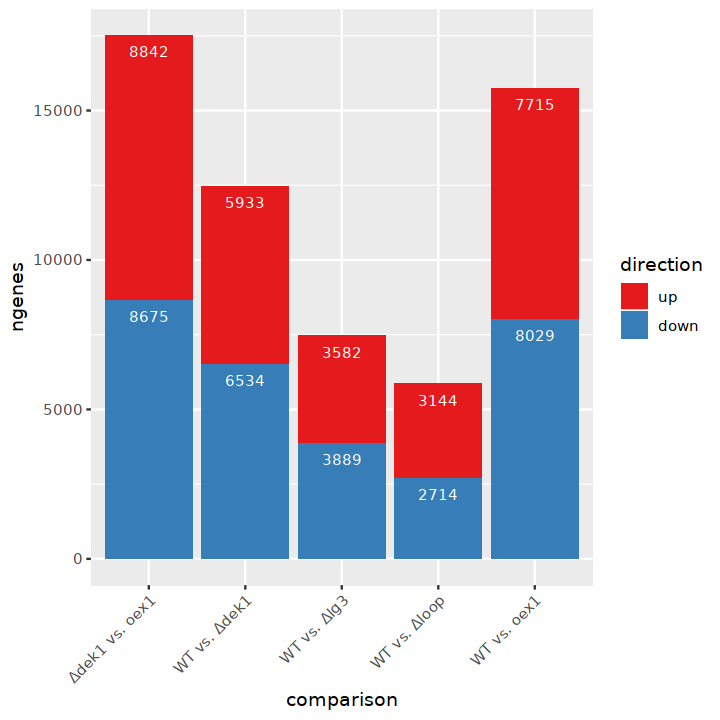

In [97]:
g=ggplot(s,aes(x=comparison,y=ngenes,fill=direction))+geom_bar(stat="identity") + 
geom_text(aes(label=ngenes), colour="white", position=position_stack(), size=3,vjust=+2)+
theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
scale_fill_brewer(palette="Set1")
g
ggsave(g,file="DEG.overall_stats.pdf",width=4,height=5,device = cairo_pdf)